In [2]:
#Downloading the dataset

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
mnist.data[0]
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)
#70000 images in the dataset and 784 features
#Every image is a 28x28 pixel and each feature is the pixel intensity 

(70000, 784) (70000,)


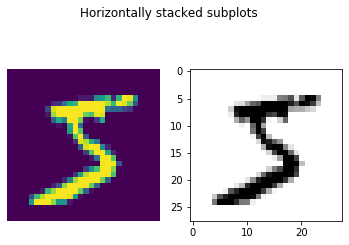

In [38]:
#Peeking at the dataset

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

fig, axs = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')

axs[0].imshow(some_digit_image)
axs[0].axis("off")

axs[1].imshow(some_digit_image, cmap="binary")

In [42]:
import numpy as np

y[0] #String value. Casting our target variable to int
y = y.astype(np.uint8)

5

In [169]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [45]:
#Train and test set split.
#Split is already done. First 60K images are for training and the remaining 10K is for test.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [46]:
#Training a binary classifier. 
#Working with the first example. "5".
#So basically we're creating a classifier to classify an example as 5 or not 5. Baby steps!

y_train_5 = (y_train == 5) #True for all 5's. False for non-5's.
y_test_5 = (y_test == 5)

y_train_5

array([ True, False, False, ...,  True, False, False])

In [47]:
#Creating a Stochastic Gradient Descent classfier. 

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train,y_train_5)

sgd_classifier_rnd = SGDClassifier(random_state=42)
sgd_classifier_rnd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
print(sgd_classifier.predict([some_digit])) #Hmm.
print(sgd_classifier_rnd.predict([some_digit]))

[False]
[ True]


In [60]:
#Evaluating a classifier
#Implementing KFold Cross-validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier_rnd)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [58]:
from sklearn.model_selection import cross_val_score

def CrossValCalc(model):
    scores = cross_val_score(model, X_train, y_train_5, scoring="accuracy", cv=3)
    print(scores)

In [59]:
CrossValCalc(sgd_classifier_rnd)

[0.95035 0.96035 0.9604 ]


In [61]:
#Checking if our dataset is skewed

from sklearn.base import BaseEstimator

class Not5Classfier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool) #i.e all predictions are "not 5".

In [62]:
not_5_clf = Not5Classfier()
CrossValCalc(not_5_clf) #ie 5 represents 10% of the dataset. Use better performance measures.
#Precision, recall, F1-score

[0.91125 0.90855 0.90915]


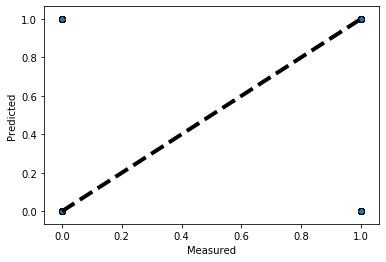

In [64]:
#Plotting the cross_val_predict scores

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier_rnd, X_train, y_train_5, cv=3) #Instead of returning eval scores, 
#it returns predictions made on each fold

# fig, ax = plt.subplots()
# ax.scatter(y_train_5, y_train_pred, edgecolors=(0, 0, 0))
# ax.plot([y_train_5.min(), y_train_5.max()], [y_train_5.min(), y_train_5.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
#Ignore the plot. All points would be concentrated at 1, 0 etc. Does not help. 


In [70]:
#Calculating the confusion matrix. 
#True (positives, negatives), False(positives, negatives)

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()
print("True Positive: ", tp, "\nTrue Negative: ", tn, "\nFalse Positive: ", fp, "\nFalse Positive: ", fn)

True Positive:  3530 
True Negative:  53892 
False Positive:  687 
False Positive:  1891


In [73]:
#Calculating precision and recall and f1-score

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: ', precision_score(y_train_5, y_train_pred))
print('\nRecall: ', recall_score(y_train_5, y_train_pred))

print('\nF1-Score', f1_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012

Recall:  0.6511713705958311

F1-Score 0.7325171197343846


In [75]:
#Using the decision_function of SGDClassifier to make predictions based on my threshold

y_scores = sgd_classifier_rnd.decision_function([some_digit])
y_scores

array([2164.22030239])

In [78]:
threshold = 5000
y_pred_some_digit = threshold < y_scores
y_pred_some_digit

array([False])

In [91]:
#Deciding on which threshold to use for classification

y_scores = cross_val_predict(sgd_classifier_rnd, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)
#With these scores we use the precision-recall curve to compute P & R for all possible thresholds

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [92]:
#Plotting precision and recall
def precision_recall_plot_with_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.legend(["Precision", "Recall"])
    plt.xlabel("Threshold")
    plt.grid(True)

60000


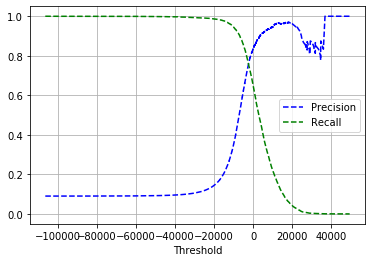

In [85]:
precision_recall_plot_with_threshold(precisions, recalls, thresholds)
plt.show()

In [86]:
#Precision vs recall
def precision_recall_plot(precisions, recalls):
    plt.plot(recalls, precisions, "b--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

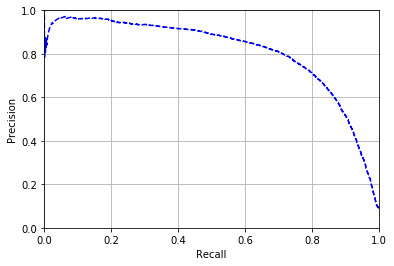

In [87]:
precision_recall_plot(precisions, recalls)

In [89]:
#Plotting for 90% precision. Understanding the tradeoff

threshold_90_prediction = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_prediction

3370.0194991439557

In [90]:
#Predict based on this threshold and check P&R values

y_predict_90 = y_scores >= threshold_90_prediction

print("Precision: ", precision_score(y_train_5, y_predict_90))
print("\nRecall: ", recall_score(y_train_5, y_predict_90))

Precision:  0.9000345901072293

Recall:  0.4799852425751706


In [93]:
#Another tool used with binary classifiers is the Receiver Operating curve (ROC)
#ROC plots Sensitivity (recall) vs (1 - Specificity) [Specificity = True Negative Rate]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [113]:
def plot_roc(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.grid(True)
    plt.xlabel("False Positive Rate", fontsize=10)
    plt.ylabel("True Positive Rate(Recall)", fontsize=10)
    plt.axis([0, 1, 0, 1])

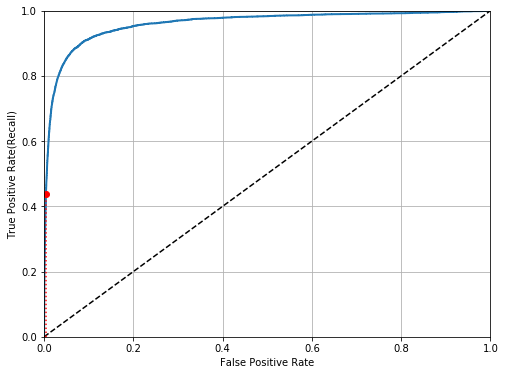

In [114]:
plt.figure(figsize=(8, 6))                         
plot_roc(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [115]:
#Calculating the area under curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [116]:
#Training a RandomForestClassifier and comparing ROC curve and AUC with SGDClassifier
#RandomForestClassifier uses predict_proba instead of decision_function()
#predict_proba returns an array containing a row per instance and a col per class

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

[0.89 0.01 0.04 ... 0.98 0.08 0.06]


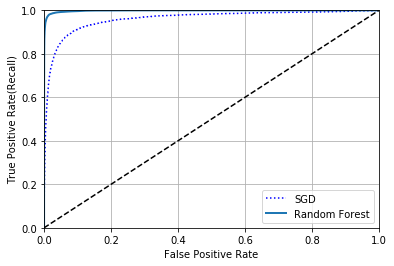

In [117]:
y_scores_forest = y_probas_forest[:, 1]
print(y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

#Plot ROC curves

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc(fpr_forest, tpr_forest, "Random Forest")
plt.legend()
plt.show()

In [118]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [121]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

print("Precision: ", precision_score(y_train_5, y_train_pred_forest))
print("\nRecall: ", recall_score(y_train_5, y_train_pred_forest))

Precision:  0.9905083315756169

Recall:  0.8662608374838591


In [122]:
#MultiClass classification
#Using a binary classifier (SVM)
#Scikit learn detects when you try to use a binary classification algo for a multiclass classification task
#and automatically runs One v/s rest OR one v/s one(pair)
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.predict([some_digit])

array([5], dtype=uint8)

In [139]:
import pandas as pd
model_details = {'CV scores': [],
                'Model Name': []}
def create_table(score, name):
    model_details['Model Name'].append(name)
    model_details['CV scores'].append(score)

In [138]:
#Calculate cross val score for every model and add to dataframe.
def scores(model, data, test):
    model_name = type(model).__name__
    print(model_name)
    
    cv_score = cross_val_score(model, data, test, cv=3, scoring="accuracy")
    some_digit_scores = model.decision_function([some_digit])
    
    print(some_digit_scores)
    print(np.argmax(some_digit_scores))
    print(model.classes_)
    print(model.classes_[5])
    
    create_table(cv_score.mean(), model_name)

In [126]:
#To force Scikit learn to choose between OvO or OvR use the individual classes
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train, y_train)
print("OVR: ", ovr_classifier.predict([some_digit]))

ovo_classifier = OneVsOneClassifier(SVC())
ovo_classifier.fit(X_train, y_train)
print("OVO: ", ovo_classifier.predict([some_digit]))

OVR:  [5]
OVO:  [5]


In [140]:
scores(svm_classifier, X_train, y_train)
scores(ovr_classifier, X_train, y_train)
scores(ovo_classifier, X_train, y_train)

SVC
[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5
[0 1 2 3 4 5 6 7 8 9]
5
OneVsRestClassifier
[[-2.20788779 -2.52734154 -1.42209483 -0.89545795 -3.66438164  1.09884347
  -3.13930844 -2.05006487 -2.51601851 -3.39312853]]
5
[0 1 2 3 4 5 6 7 8 9]
5
OneVsOneClassifier
[[ 2.72420789  2.72909219  7.25265966  8.30764043 -0.31037527  9.31302684
   0.70957317  2.76678409  6.22757724  4.84005057]]
5
[0 1 2 3 4 5 6 7 8 9]
5


In [141]:
df = pd.DataFrame(model_details, columns = ['Model Name', 'CV scores'])
print(df)

            Model Name  CV scores
0                  SVC   0.974900
1  OneVsRestClassifier   0.975200
2   OneVsOneClassifier   0.974367


In [142]:
#Scaling the input

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [144]:
y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5586,    0,   21,    6,    8,   44,   37,    6,  214,    1],
       [   1, 6399,   37,   25,    4,   45,    4,    8,  207,   12],
       [  28,   27, 5232,   92,   72,   27,   68,   38,  364,   10],
       [  23,   17,  117, 5234,    2,  206,   26,   40,  393,   73],
       [  12,   14,   49,   10, 5183,   12,   35,   25,  335,  167],
       [  28,   15,   30,  165,   53, 4452,   73,   17,  524,   64],
       [  29,   16,   44,    2,   41,  100, 5552,    3,  130,    1],
       [  20,   10,   51,   29,   48,   12,    3, 5695,  182,  215],
       [  19,   62,   47,   90,    3,  127,   24,   10, 5423,   46],
       [  22,   18,   30,   64,  122,   36,    1,  178,  351, 5127]],
      dtype=int64)

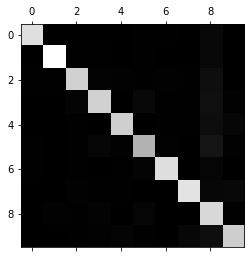

In [145]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#5 looks slightly darker, which could either mean that fewer images of 5 exist in the dataset OR
#Classifier does not perform as well on 5s as other digits

In [147]:
#Calculating error rates
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

np.around(norm_conf_mx,2)

array([[0.94, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.04, 0.  ],
       [0.  , 0.95, 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.88, 0.02, 0.01, 0.  , 0.01, 0.01, 0.06, 0.  ],
       [0.  , 0.  , 0.02, 0.85, 0.  , 0.03, 0.  , 0.01, 0.06, 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.89, 0.  , 0.01, 0.  , 0.06, 0.03],
       [0.01, 0.  , 0.01, 0.03, 0.01, 0.82, 0.01, 0.  , 0.1 , 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.01, 0.02, 0.94, 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.91, 0.03, 0.03],
       [0.  , 0.01, 0.01, 0.02, 0.  , 0.02, 0.  , 0.  , 0.93, 0.01],
       [0.  , 0.  , 0.01, 0.01, 0.02, 0.01, 0.  , 0.03, 0.06, 0.86]])

[[0.     0.     0.0035 0.001  0.0014 0.0074 0.0062 0.001  0.0361 0.0002]
 [0.0001 0.     0.0055 0.0037 0.0006 0.0067 0.0006 0.0012 0.0307 0.0018]
 [0.0047 0.0045 0.     0.0154 0.0121 0.0045 0.0114 0.0064 0.0611 0.0017]
 [0.0038 0.0028 0.0191 0.     0.0003 0.0336 0.0042 0.0065 0.0641 0.0119]
 [0.0021 0.0024 0.0084 0.0017 0.     0.0021 0.006  0.0043 0.0573 0.0286]
 [0.0052 0.0028 0.0055 0.0304 0.0098 0.     0.0135 0.0031 0.0967 0.0118]
 [0.0049 0.0027 0.0074 0.0003 0.0069 0.0169 0.     0.0005 0.022  0.0002]
 [0.0032 0.0016 0.0081 0.0046 0.0077 0.0019 0.0005 0.     0.0291 0.0343]
 [0.0032 0.0106 0.008  0.0154 0.0005 0.0217 0.0041 0.0017 0.     0.0079]
 [0.0037 0.003  0.005  0.0108 0.0205 0.0061 0.0002 0.0299 0.059  0.    ]]


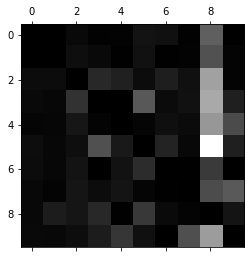

In [156]:
#Plotting only the errors
np.fill_diagonal(norm_conf_mx, 0)
print(np.around(norm_conf_mx,4))

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#Confusion between 3 and 5 on both axes is noticed. 
#Many 5's misclassified as 8's. Might need more data to represent 8. 

In [158]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

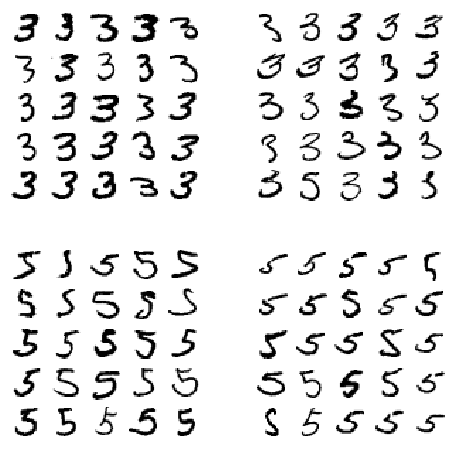

In [160]:
#Analyzing 3 & 5 

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [161]:
#Multilabel classification: Associating 1 instanc ewith multiple classes
#Using K nearest neighbors for this
#Example: Classifiying 7,8,9 as a large number and checking if it is odd
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
print(y_multilabel)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
#Predicting on 5 (Correct output)
knn_clf.predict([some_digit]) 

array([[False,  True]])

In [163]:
#Evaluating a multilabel classifier
#Take f1 score for every label and average it.
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") #macro - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

0.976410265560605

In [164]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted") #GIving every label a weight = to support (i.e number of instances with that target label)

0.9778357403921755

In [166]:
#Multioutput classification(MOC)
#Adding noise and creating a MOC
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [190]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])

In [191]:
def plot_noisy_and_clean(index):
    some_index = index
    plt.subplot(121); plot_digit(X_test_mod[some_index])
    plt.subplot(122); plot_digit(y_test_mod[some_index])
    plt.show()

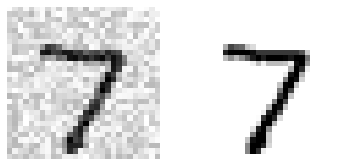

In [192]:
plot_noisy_and_clean(0)

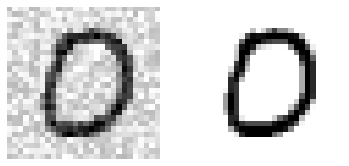

In [193]:
plot_noisy_and_clean(10)

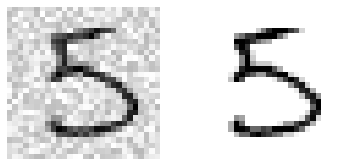

In [194]:
plot_noisy_and_clean(15)

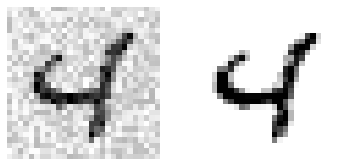

In [196]:
plot_noisy_and_clean(67)

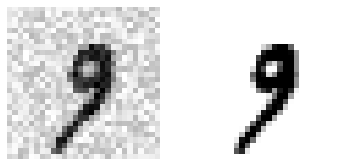

In [197]:
plot_noisy_and_clean(1000)